# Import necessary libraries

In [1]:
import os
import random
import numpy as np
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [2]:
#paths to train,test and validatio directories
train_dir = r'C:\Users\niveditiha\Desktop\BDA\flowers\train'
validation_dir = r'C:\Users\niveditiha\Desktop\BDA\flowers\validation'
test_dir = r'C:\Users\niveditiha\Desktop\BDA\flowers\test'

In [3]:
# Define some constants
IMG_HEIGHT = 224  
IMG_WIDTH = 224   
BATCH_SIZE = 10 
NUM_CLASSES = len(os.listdir(train_dir))

In [4]:
# Initialize an ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values to be between 0 and 1
    shear_range=0.2,     # Shear Intensity
    zoom_range=0.2,      # Random Zoom
    horizontal_flip=True # Randomly flip inputs horizontally
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # For multiclass classification
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)

Found 559 images belonging to 10 classes.
Found 118 images belonging to 10 classes.
Found 106 images belonging to 10 classes.


In [6]:
class_names = sorted(os.listdir(train_dir))

In [7]:
class_names

['bougainvillea',
 'daisies',
 'garden roses',
 'gardenias',
 'hibiscus',
 'hydrangeas',
 'lilies',
 'orchids',
 'peonies',
 'tulip']

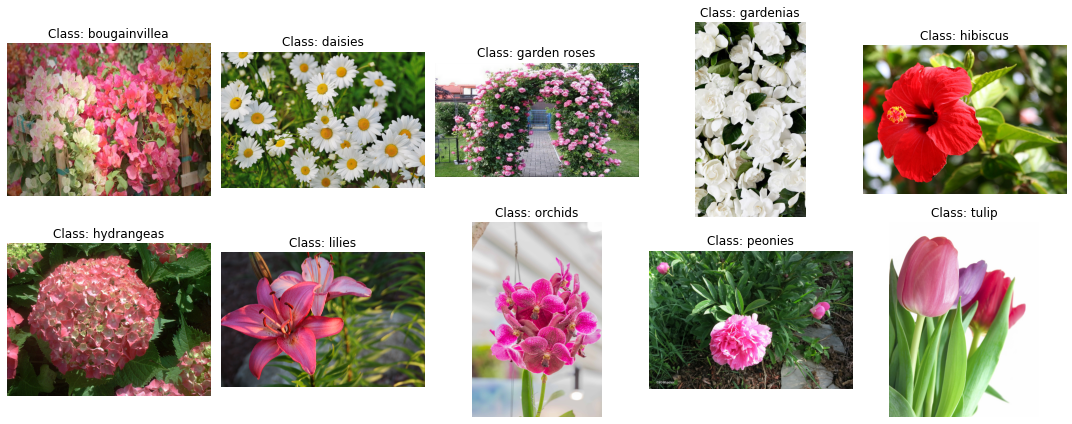

In [8]:
# List all the subdirectories (classes) in train_dir
classes = os.listdir(train_dir)

# Define a function to display one image from each class
def display_one_image_per_class(class_name):
    class_folder = os.path.join(train_dir, class_name)
    images = os.listdir(class_folder)
    random_image = random.choice(images)
    image_path = os.path.join(class_folder, random_image)
    image = Image.open(image_path)
    return image

# Display one image from each class
num_classes = len(classes)
num_images_per_row = 5
num_rows = (num_classes + num_images_per_row - 1) // num_images_per_row

plt.figure(figsize=(15, 3*num_rows))
for i, class_name in enumerate(classes):
    plt.subplot(num_rows, num_images_per_row, i+1)
    image = display_one_image_per_class(class_name)
    plt.imshow(image)
    plt.title(f'Class: {class_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,  # Use the pre-trained model as the base
    Flatten(),   # Flatten the output of the pre-trained model
    Dense(256, activation='relu'),  # Add a fully connected layer
    Dense(10, activation='Softmax')  # Output layer for binary classification
])

# Set the layers of the pre-trained model to non-trainable
for layer in base_model.layers:
    layer.trainable = False


In [10]:
#Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
history=model.fit(train_generator, epochs=8, validation_data=val_generator)

Epoch 1/8
56/56 [==============================] - 147s 3s/step - loss: 2.0076 - accuracy: 0.5224 - val_loss: 1.2635 - val_accuracy: 0.4407
Epoch 2/8
56/56 [==============================] - 134s 2s/step - loss: 0.6703 - accuracy: 0.7853 - val_loss: 2.2323 - val_accuracy: 0.4661
Epoch 3/8
56/56 [==============================] - 131s 2s/step - loss: 0.3604 - accuracy: 0.8855 - val_loss: 0.6742 - val_accuracy: 0.7458
Epoch 4/8
56/56 [==============================] - 130s 2s/step - loss: 0.2306 - accuracy: 0.9249 - val_loss: 0.4869 - val_accuracy: 0.8220
Epoch 5/8
56/56 [==============================] - 128s 2s/step - loss: 0.1636 - accuracy: 0.9553 - val_loss: 1.5455 - val_accuracy: 0.7119
Epoch 6/8
56/56 [==============================] - 132s 2s/step - loss: 0.1637 - accuracy: 0.9320 - val_loss: 0.8188 - val_accuracy: 0.7966
Epoch 7/8
56/56 [==============================] - 130s 2s/step - loss: 0.0927 - accuracy: 0.9696 - val_loss: 1.2073 - val_accuracy: 0.7034
Epoch 8/8
56/56 [===

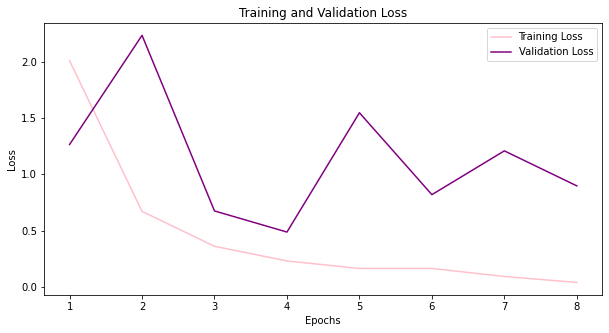

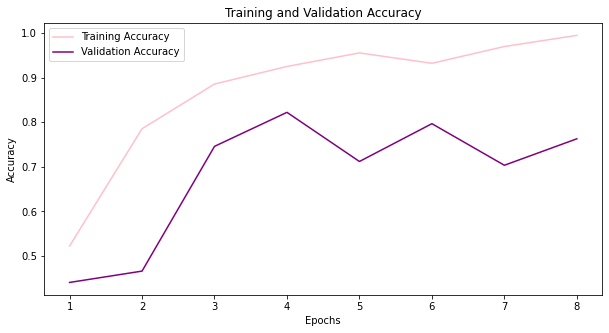

In [12]:
# Get the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'pink', label='Training Loss')
plt.plot(epochs, validation_loss, 'purple', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, 'pink', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'purple', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
#Test the model

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

11/11 [==============================] - 16s 1s/step - loss: 0.5106 - accuracy: 0.8679
Test accuracy: 86.79%


11/11 [==============================] - 19s 2s/step


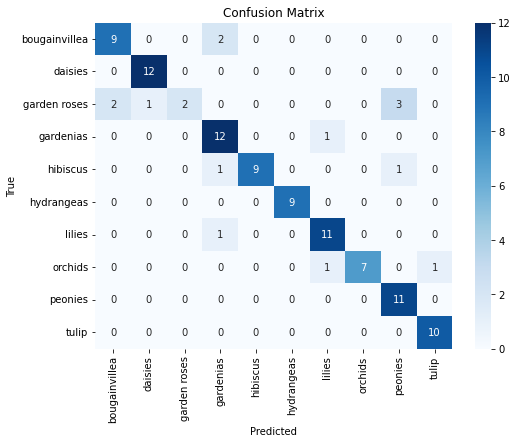

In [14]:
# Generate predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calculate confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Define class labels (assuming they are in the same order as classes in generator)
class_labels = list(test_generator.class_indices.keys())

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d',
            xticklabels=class_labels,
            yticklabels=class_labels,
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
# Generate a classification report
classification_rep = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(classification_rep)


               precision    recall  f1-score   support

bougainvillea       0.82      0.82      0.82        11
      daisies       0.92      1.00      0.96        12
 garden roses       1.00      0.25      0.40         8
    gardenias       0.75      0.92      0.83        13
     hibiscus       1.00      0.82      0.90        11
   hydrangeas       1.00      1.00      1.00         9
       lilies       0.85      0.92      0.88        12
      orchids       1.00      0.78      0.88         9
      peonies       0.73      1.00      0.85        11
        tulip       0.91      1.00      0.95        10

     accuracy                           0.87       106
    macro avg       0.90      0.85      0.85       106
 weighted avg       0.89      0.87      0.86       106



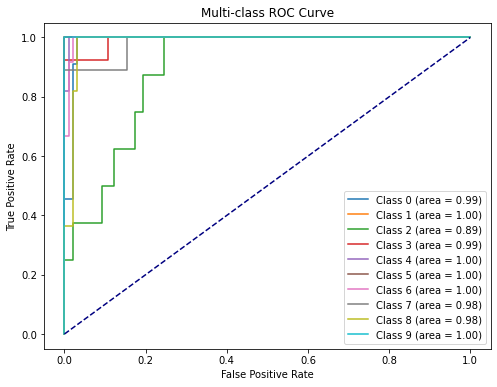

In [16]:
from sklearn.metrics import roc_curve, auc

# Get ROC curve and area under the curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend()
plt.show()
